In [1]:
%run /home/dbaciur/NTU/NTU/notes/Constants.ipynb
%run /home/dbaciur/NTU/NTU/notes/CommonUtils.ipynb

Constants loaded


Here we split Frames into Splits, based on their layouts

In [2]:
import torch
import torchvision as tv

import os
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import intervals as I
import moviepy
from pathlib import Path
from moviepy.editor import VideoFileClip

In [3]:
frames_df = pd.read_csv(C.Frames.CHART_IMAGE_S10_LABEL_0, converters=C.F_CONVERTERS)
frames_df.head()

,Id,Video,Time,Event id,Beh id,RA,Collision events,Behs,Layout,Layouts,Splits,Origin
0,PH1104-MECHANICS_20150817_PC1__2886.1575000000...,PH1104-MECHANICS_20150817_PC1,2886.1575,729,B_WRITING_BOARD,RA13,[],[],4,"[1, 2]",[PH1104-MECHANICS_20150817_PC1__2886.157500000...,new_frames_for_chart_image_label_0_gap_10
1,PH1104-MECHANICS_20150817_PC1__44.2295__738__B...,PH1104-MECHANICS_20150817_PC1,44.2295,738,B_MOVEMENT,RA2,[],[],5,"[2, 1]",[PH1104-MECHANICS_20150817_PC1__44.2295__738__...,new_frames_for_chart_image_label_0_gap_10
2,PH1104-MECHANICS_20150817_PC1__1881.4025__751_...,PH1104-MECHANICS_20150817_PC1,1881.4025,751,B_STANDS,RA2,[],[],5,"[2, 1]",[PH1104-MECHANICS_20150817_PC1__1881.4025__751...,new_frames_for_chart_image_label_0_gap_10
3,PH1104-MECHANICS_20150817_PC1__1967.781__752__...,PH1104-MECHANICS_20150817_PC1,1967.7810,752,B_STANDS,RA2,[],[],4,"[1, 2]",[PH1104-MECHANICS_20150817_PC1__1967.781__752_...,new_frames_for_chart_image_label_0_gap_10
4,PH1104-MECHANICS_20150817_PC1__2687.4440000000...,PH1104-MECHANICS_20150817_PC1,2687.4440,763,B_WRITING_BOARD,RA2,[],[],4,"[1, 2]",[PH1104-MECHANICS_20150817_PC1__2687.444000000...,new_frames_for_chart_image_label_0_gap_10


### Split

In [4]:
already_split = []
for _, frame in tqdm(frames_df.iterrows()):
    split_names = frame[C.F_SPLITS]
    
    split_1 = f"{C.Frames.FRAMES_SCREENSHOTS_PATH}/{split_names[0]}.pt"
    split_2 = f"{C.Frames.FRAMES_SCREENSHOTS_PATH}/{split_names[0]}.pt"
    
    if os.path.exists(split_1) and os.path.exists(split_2):
        already_split.append(frame[C.F_ID])
    
len(already_split)

139

In [5]:
to_split = list(frames_df[C.F_ID])
to_split = [fid for fid in to_split if fid not in already_split]
len(to_split)

3497

In [6]:
frames_to_split = frames_df[frames_df[C.F_ID].isin(to_split)]

def split_frames():
        
    Path(C.Frames.FRAMES_SCREENSHOTS_PATH).mkdir(exist_ok=True)
    
    print(len(frames_to_split))
    for _, frame in tqdm(frames_to_split.iterrows()):
        
        frame_id = frame[C.F_ID]
        layout = frame[C.F_LAYOUT]
        layouts = frame[C.F_LAYOUTS]
        splits = frame[C.F_SPLITS]

        frame = torch.load(f"{C.Frames.FRAMES_SCREENSHOTS_PATH}/{frame_id}.pt")

        split_path_1 = f"{C.Frames.FRAMES_SCREENSHOTS_PATH}/{splits[0]}.pt"
        split_path_2 = f"{C.Frames.FRAMES_SCREENSHOTS_PATH}/{splits[1]}.pt"

        if splits[0] == splits[1]:        
            torch.save(frame, split_path_1)
            continue

        # Two splits
        height = frame.shape[1]
        width = frame.shape[2]
        
        split_frames = []
        if layout < 7:
            split_frames = [
                frame[:, :height//2, :width//3, :],
                frame[:, :, width//3:, :]
            ]
        else:
            split_frames = [
                frame[:, :, :width//2, :],
                frame[:, :, width//2:, :]
            ]

        torch.save(split_frames[0], split_path_1)
        torch.save(split_frames[1], split_path_2)

In [7]:
split_frames()

3497


In [52]:
frame0 = torch.load(f"{C.Frames.FRAMES_SCREENSHOTS_PATH}/PH1011-PHYSICS_20150922__3435.269__40__B_CHARTS_P__RA13.pt")
frame1 = torch.load(f"{C.Frames.FRAMES_SCREENSHOTS_PATH}/PH1011-PHYSICS_20150922__3435.269__40__B_CHARTS_P__RA13__Left.pt")
frame2 = torch.load(f"{C.Frames.FRAMES_SCREENSHOTS_PATH}/PH1011-PHYSICS_20150922__3435.269__40__B_CHARTS_P__RA13__Right.pt")

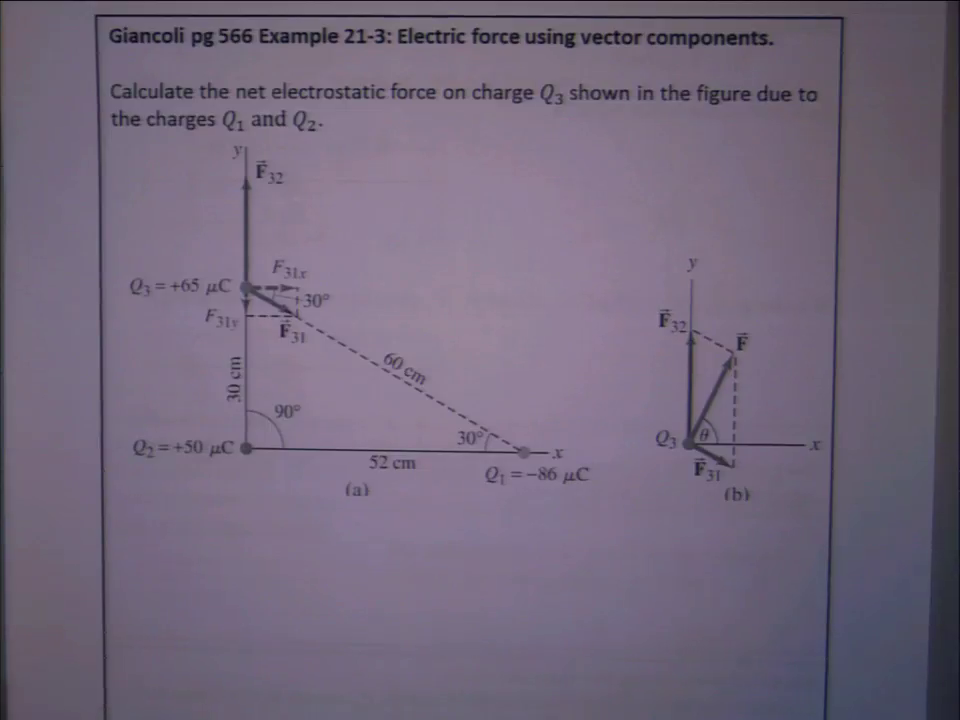

In [54]:
rgb_frame_to_image(frame2.squeeze())